## Các yếu tố thời tiết (nhiệt độ, độ ẩm, gió, áp suất…) có tác động và mức độ tương quan như thế nào đến lượng mưa

Tiến hành đọc dữ liệu để xem trong dữ liệu có những yếu tố thời tiết nào liên quan

In [1]:
!pip install windrose

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from windrose import WindroseAxes

In [3]:
df = pd.read_csv('../data/processed/weather_processed.csv')
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665672 entries, 0 to 665671
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   latitude                 665672 non-null  float64
 1   longitude                665672 non-null  float64
 2   datetime                 665672 non-null  object 
 3   temperature (C degree)   665672 non-null  float64
 4   humidity (%)             665672 non-null  float64
 5   precipitation (mm)       297661 non-null  float64
 6   windspeed (km/h)         665672 non-null  float64
 7   winddirection (degrees)  665672 non-null  float64
 8   pressure (hPa)           665672 non-null  float64
 9   dewpoint (C degree)      665672 non-null  float64
 10  month                    665672 non-null  int64  
 11  hour                     665672 non-null  int64  
 12  season                   665672 non-null  object 
 13  day_night                665672 non-null  object 
 14  loca

- Các yếu tố thời tiết sẽ được phân tích và đánh giá  gồm 
    * temperature (C degree) : nhiệt độ không khí.
    * humidity (%)  : độ ẩm tương đối
    * windspeed (km/h)   : tốc độ gió
    * winddirection (degrees) : hướng gió
    * cloudcover (%) : độ che phủ của mây
    * pressure (hPa) : áp suất tại mực nước biển trung bình
    * dewpoint (C degree) :nhiệt độ điểm sương, nhiệt độ hơi nước cần lạnh đi để đạt 100% độ ẩm, từ đó bắt đầu ngưng tụ.
    
- Tiến hành chia các yếu tố sau thành 6 nhóm dựa trên sự tương đồng về đơn vị
    * Nhóm 1: temperature, dewpoint (C degree)
    * Nhóm 2: humidity, cloudcover (%)
    * Nhóm 3: winddirection (degrees)
    * Nhóm 4: windspeed (km/h)
    * Nhóm 5: pressure (hPa)

### Câu hỏi nhỏ
- Nhiệt độ có tương quan dương hay âm với lượng mưa?
- Nhiệt độ điểm sương có tương quan mạnh với khả năng mưa hay không?
- Độ ẩm ảnh hưởng như thế nào đến khả năng xuất hiện mưa?
- Áp suất khí quyển giảm có làm tăng khả năng mưa hay không?
- Tốc độ gió có liên quan tới lượng mưa trong các thời điểm xảy ra mưa?
- Hướng gió ảnh hưởng như thế nào đến phân bố lượng mưa?
- Ngưỡng giá trị nào của nhiệt độ, độ ẩm,... sẽ dẫn đến hiện tượng mưa?
- Yếu tố nào là mạnh nhất trong việc dự đoán lượng mưa?
- Có yếu tố nào chỉ có tương quan nhưng không phải nguyên nhân?

In [4]:
# Hàm vẽ biểu đồ phân tán giữa nhiệt độ và lượng mưa
def plot_scatter_with_rain(column, rain_column):
    # Lọc bỏ các ô có lượng mưa = 0
    mask = rain_column > 0
    column = column[mask]
    rain_column = rain_column[mask]
    # Biểu đồ
    plt.figure(figsize=(10, 6))
    plt.scatter(column, rain_column, alpha=0.4, edgecolor='k')
    plt.title(f'The correlation between {column.name} and precipitation')
    plt.xlabel(column.name)
    plt.ylabel('Rainfall (mm)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

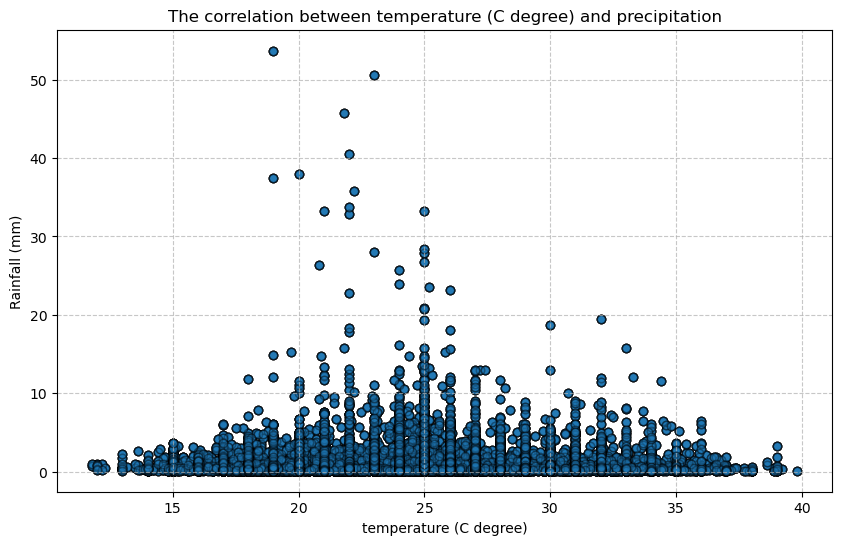

In [5]:
plot_scatter_with_rain(df['temperature (C degree)'], df['precipitation (mm)'])

#### Nhận xét:
- Từ biểu đồ phân tán ta thấy mưa xuất hiện hầu như ở mọi nhiệt độ từ 11-40°C tuy nhiên các trận mưa có lượng mưa lớn (>20mm) chỉ xuất hiện trong khoảng từ 20-25°C. Điều này có thể cho thấy rằng Huế có mưa ở nhiều mức nhiệt khác nhau và nhiệt độ trung bình trong khoảng 20-25°C thuận lợi cho các cơn mưa lớn.
- Lượng mưa phân bố không đều, đa số sẽ tập trung từ 0mm đến 15mm.

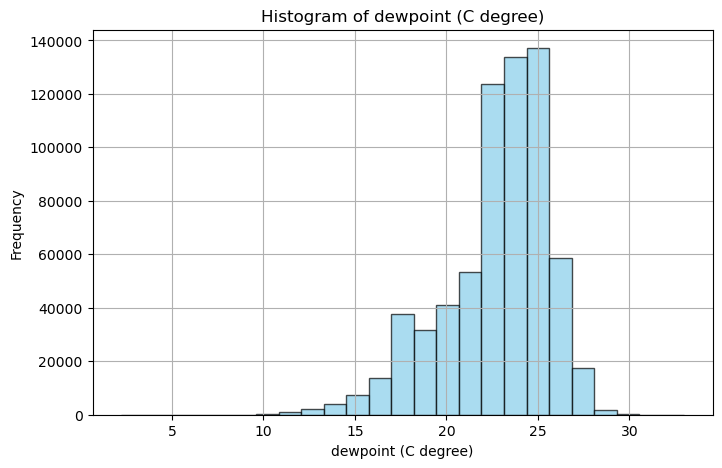

In [6]:

def histogram_by_name(df, col_name, bins=25):
    plt.figure(figsize=(8, 5))
    
    data = df[col_name].dropna()
    
    plt.hist(
        data,
        bins=bins,
        color='skyblue',
        edgecolor='black',
        alpha=0.7
        
        
    )
    plt.title(f'Histogram of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

histogram_by_name(df, 'dewpoint (C degree)')

- Dựa vào biểu đồ, có thể thấy giá trị điểm sương (dewpoint) tại Huế tập trung chủ yếu trong khoảng 23–25°C, với tần suất giảm nhanh về hai phía ngoài khoảng này. Điều này cho thấy trong phần lớn thời gian, không khí duy trì độ ẩm rất cao, tiệm cận trạng thái bão hòa. 
- Bên cạnh đó, các giá trị dewpoint thấp (đặc biệt dưới 17°C) xuất hiện với tần suất rất nhỏ, phản ánh môi trường hiếm khi khô và đặc trưng khí hậu nóng ẩm chiếm ưu thế rõ rệt

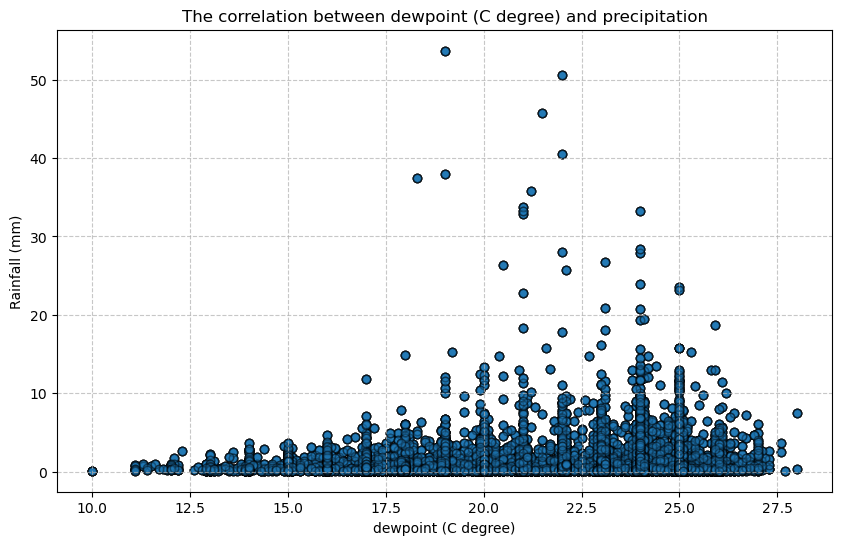

In [7]:
plot_scatter_with_rain(df['dewpoint (C degree)'], df['precipitation (mm)'])

- Từ biểu đồ ta thấy mưa xuất hiện hầu như ở tất cả các giá trị dewpoint trong khoảng từ 11 đến 27,5°C. Tuy nhiên, những trận mưa lớn (>15 mm) hầu như chỉ xuất hiện trong khoảng dewpoint từ 20–25°C, cho thấy khi không khí đạt độ ẩm cao (dewpoint lớn), điều kiện thuận lợi cho sự hình thành và phát triển của các quá trình gây mưa mạnh, trong khi ở các giá trị dewpoint thấp hơn, mưa chủ yếu có cường độ nhỏ hoặc không đáng kể.
- Điều này cho thấy dewpoint phản ánh mức độ ẩm thuận lợi cho mưa.

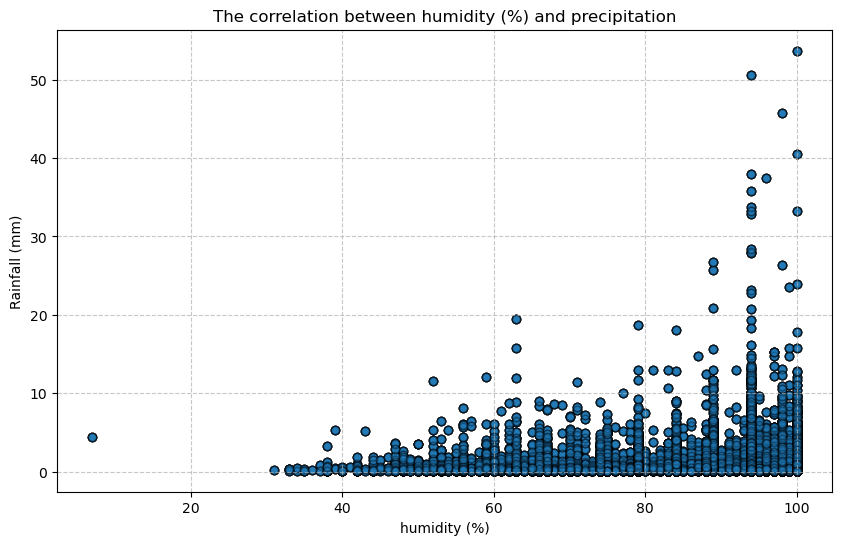

In [8]:
plot_scatter_with_rain(df['humidity (%)'], df['precipitation (mm)'])

- Biểu đồ phân tán cho thấy lượng mưa có xu hướng tăng khi độ ẩm không khí tăng.
- Các trận mưa lớn chủ yếu xuất hiện khi độ ẩm cao, đặc biệt trên khoảng 85–100%, trong khi ở các mức độ ẩm thấp, lượng mưa thường rất nhỏ hoặc không đáng kể. Khi độ ẩm thấp hơn 30% gần như không xuất hiện cơn mưa nào.
- Điều này cho thấy độ ẩm cao là điều kiện thuận lợi cho mưa.

In [9]:
def windrose_plot(df, direction_col, speed_col):
    wd = df[direction_col]
    ws = df[speed_col]

    # Tạo figure
    plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='black')
    ax.set_title(f"Wind Rose của {direction_col} và {speed_col}")
    ax.set_legend(title="Tốc độ gió (km/h)")

    plt.show()

<Figure size 800x800 with 0 Axes>

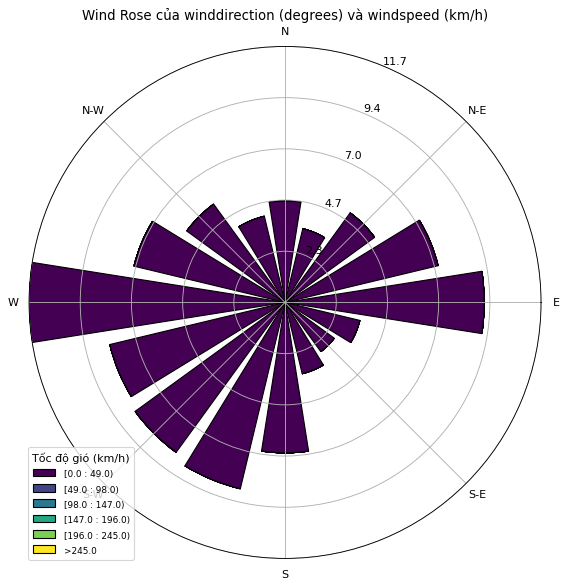

In [10]:
windrose_plot(df, 'winddirection (degrees)', 'windspeed (km/h)')


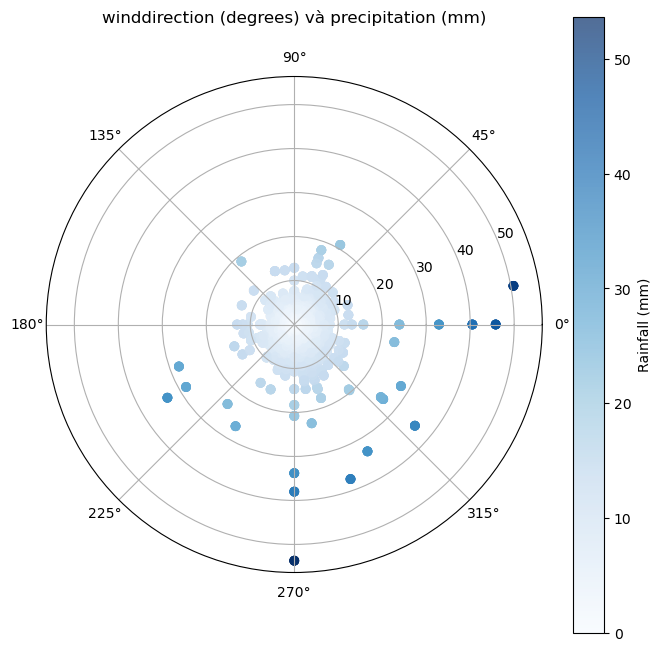

In [11]:
#  Vẽ biểu đồ tương quan: hướng gió (độ) vs lượng mưa (mm)
def polar_scatter_rainfall(df, direction_col, rain_col):

    wd = df[direction_col]
    rain = df[rain_col]

    # Chuyển độ sang radian
    angles = np.deg2rad(wd)

    # Tạo biểu đồ
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')

    scatter = ax.scatter(
        angles, rain,
        c=rain,
        cmap='Blues',
        alpha=0.7
    )

    ax.set_title(f"{direction_col} và {rain_col}", pad=20)
    plt.colorbar(scatter, label="Rainfall (mm)")

    plt.show()
    
polar_scatter_rainfall(df, 'winddirection (degrees)', 'precipitation (mm)')


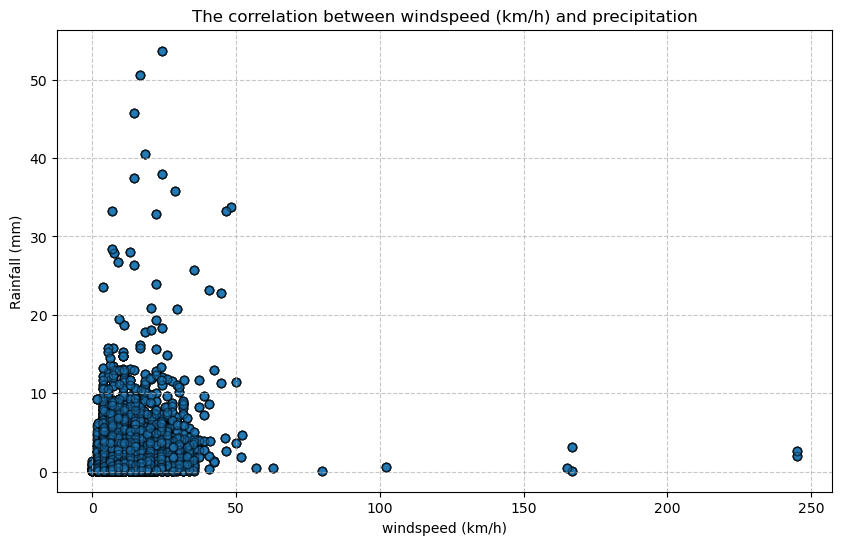

In [12]:
plot_scatter_with_rain(df['windspeed (km/h)'], df['precipitation (mm)'])

- Biểu đồ cho thấy mối tương quan giữa hướng gió, tốc độ gió và lượng mưa là không mạnh và không trực tiếp. 
- Gió thịnh hành chủ yếu từ Tây và Tây Nam, nhưng lượng mưa không tập trung rõ ràng theo một hướng gió cụ thể. 
- Biểu đồ phân tán cho thấy mưa lớn thường xảy ra khi tốc độ gió thấp đến trung bình (0-40km/h), còn khi gió rất mạnh (>50km/h) thì lượng mưa lại ít, cho thấy tốc độ gió không quyết định lượng mưa.

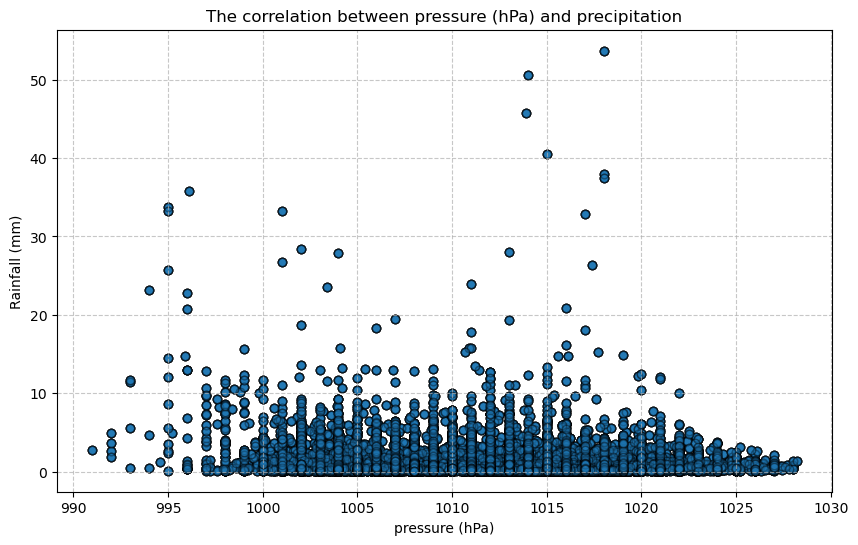

In [13]:
plot_scatter_with_rain(df['pressure (hPa)'], df['precipitation (mm)'])

- Biểu đồ cho thấy không có mối quan hệ rõ ràng giữa áp suất khí quyển và lượng mưa ở Huế.
- Mặc dù áp suất thấp (dưới 1000 hPa) đôi khi đi kèm với lượng mưa cao, nhưng phần lớn dữ liệu không có sự tương quan mạnh mẽ, và lượng mưa chủ yếu dao động trong khoảng 0 đến 10 mm.

## NHẬN XÉT CHUNG
Ghi chú về cách xác định các ngưỡng thời tiết: Các ngưỡng của nhiệt độ, độ ẩm, dewpoint,… được rút ra bằng cách lọc và quan sát phân bố các điểm có lượng mưa lớn (rainfall > 15mm) trên các biểu đồ tương quan. Việc đối chiếu trực tiếp giúp thấy rõ khoảng giá trị mà tại đó mưa xuất hiện nhiều nhất.

#### Ngưỡng giá trị nào của nhiệt độ, độ ẩm,... sẽ dẫn đến hiện tượng mưa?

- Dữ liệu cho thấy mưa có thể xuất hiện trong nhiều điều kiện khác nhau, tuy nhiên các trận mưa lớn tập trung rõ nhất khi nhiệt độ khoảng 20–25°C, dewpoint trong khoảng 20–25°C và độ ẩm cao trên 80–85%. 
- Nguyên nhân là ở các ngưỡng này, không khí chứa nhiều hơi nước và gần đạt trạng thái bão hòa, làm tăng khả năng ngưng tụ hơi nước thành mây dày và mưa. Khi nhiệt độ thấp hơn, dewpoint giảm hoặc độ ẩm dưới 30%, lượng hơi nước trong không khí không đủ lớn, quá trình ngưng tụ yếu nên mưa hiếm khi xảy ra hoặc chỉ có cường độ nhỏ.

#### Yếu tố nào là mạnh nhất trong việc dự đoán lượng mưa? Có yếu tố nào chỉ có tương quan nhưng không phải nguyên nhân?

- Trong các yếu tố được xem xét, độ ẩm (thể hiện qua dewpoint và độ ẩm tương đối) là yếu tố mạnh nhất trong việc dự đoán khả năng và cường độ mưa, vì đây là đại lượng phản ánh trực tiếp lượng hơi nước sẵn có trong khí quyển – điều kiện cần thiết để hình thành mưa.
- Ngược lại, áp suất khí quyển, hướng gió và tốc độ gió chỉ thể hiện mối tương quan gián tiếp chứ không phải nguyên nhân trực tiếp, do mưa vẫn xuất hiện ở nhiều mức áp suất và vận tốc gió khác nhau. Các yếu tố này chủ yếu phản ánh trạng thái và hoàn lưu thời tiết chung, trong khi bản thân chúng không quyết định trực tiếp lượng hơi nước hay quá trình ngưng tụ gây mưa.